In [1]:
from skmultiflow.evaluation import EvaluatePrequential
from skmultiflow.data import FileStream
from skmultiflow.lazy import KNNADWINClassifier
from sklearn.linear_model import SGDClassifier
from skmultiflow.core import Pipeline
from skmultiflow.transform import OneHotToCategorical
%matplotlib notebook

This demo will test a prequential evaluation when more than one learner is passed, which makes it a comparison task.

In [2]:
# Stream setup
stream = FileStream("https://raw.githubusercontent.com/scikit-multiflow/streaming-datasets/"
                    "master/covtype.csv")

In [3]:
# Setup classifiers
clf = SGDClassifier()
clf2 = KNNADWINClassifier(n_neighbors=8, max_window_size=1000, leaf_size=30)

In [4]:
t_one = OneHotToCategorical([[10, 11, 12, 13],
                            [14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
                            27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39,
                            40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53]])

In [5]:
# Set up pipe
pipe_one = Pipeline([('one_hot_to_categorical', t_one), ('KNNClassifier', clf2)])

In [6]:
classifiers = [clf, pipe_one]

In [7]:
# Instantiate evaluator
evaluator = EvaluatePrequential(pretrain_size=2000, output_file=None,
                                max_samples=10000, batch_size=1, n_wait=200, max_time=1000, show_plot=True)

<IPython.core.display.Javascript object>


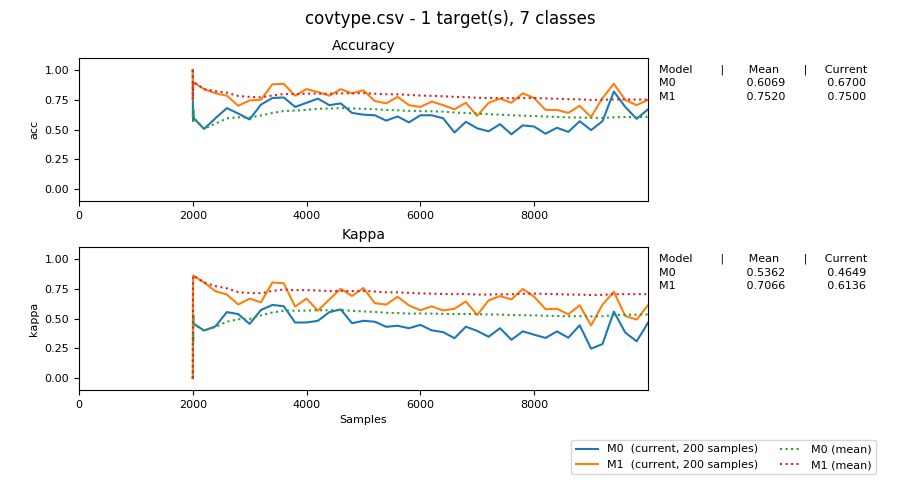

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 2000 sample(s).
Evaluating...
 #################### [100%] [60.20s]
Processed samples: 10000
Mean performance:
M0 - Accuracy     : 0.6069
M0 - Kappa        : 0.5362
M1 - Accuracy     : 0.7520
M1 - Kappa        : 0.7066


[SGDClassifier(alpha=0.0001, average=False, class_weight=None,
               early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
               l1_ratio=0.15, learning_rate='optimal', loss='hinge',
               max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
               power_t=0.5, random_state=None, shuffle=True, tol=0.001,
               validation_fraction=0.1, verbose=0, warm_start=False),
 Pipeline(steps=[('one_hot_to_categorical',
                  OneHotToCategorical(categorical_list=[[10, 11, 12, 13],
                                                        [14, 15, 16, 17, 18, 19,
                                                         20, 21, 22, 23, 24, 25,
                                                         26, 27, 28, 29, 30, 31,
                                                         32, 33, 34, 35, 36, 37,
                                                         38, 39, 40, 41, 42, 43, ...]])),
                 ('KNNClassifier',
  

In [8]:
# Run evaluation
evaluator.evaluate(stream=stream, model=classifiers)